# Image Processing Basics



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

stage1_sample_submission.csv
stage1_test
stage1_train
stage1_train_labels.csv



In [4]:
# Importing the other necessary libraries
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading the image

In [2]:
# Importing OpenCV - the computer vision library
import cv2

In [5]:
# Glob the training data and load a single image path
training_paths = pathlib.Path('../input/stage1_train').glob('*/images/*.png')
training_sorted = sorted([x for x in training_paths])
# print(len(training_sorted))
im_path = training_sorted[45]

Original Image Shape (520, 696, 3)


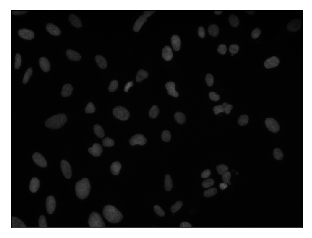

In [6]:
# Reading the image 
bgrimg = cv2.imread(str(im_path))
plt.imshow(bgrimg)
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('Original Image Shape',bgrimg.shape)

In [7]:
# To see the structure of the image let's display one row of the image matrix
print('The first row of the image matrix contains',len(bgrimg[0]),'pixels')
print(bgrimg[0])

The first row of the image matrix contains 696 pixels
[[3 3 3]
 [3 3 3]
 [7 7 7]
 ...
 [1 1 1]
 [1 1 1]
 [1 1 1]]


In [8]:
# Transfrom the colorspace from BGR to grayscale so as to make things simpler
grayimg = cv2.cvtColor(bgrimg,cv2.COLOR_BGR2GRAY)

New Image Shape (520, 696)


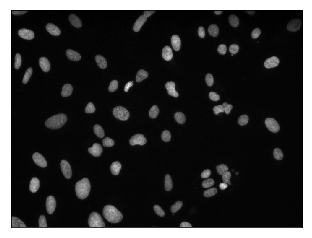

In [9]:
# Plot the image
plt.imshow(grayimg,cmap='gray') #cmap has been used as matplotlib uses some default colormap to plot grayscale images
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('New Image Shape',grayimg.shape)

In [10]:
# This displays one entire row of the image matrix with the corresponding luminance or intensities for each pixel
print('The first row of the image matrix contains',len(grayimg[1]),'pixels')
print(grayimg[1])

The first row of the image matrix contains 696 pixels
[ 3  6 13 19 20 22 26 27 27 25 24 25 25 26 30 30 31 32 29 28 27 31 32 31
 30 30 32 32 31 28 30 31 33 29 27 25 25 24 22 22 20 16 10  6  4  2  2  2
  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  2  2  1  2  2  2  1  1  2  2  2  2  1  1  1  1  2  1  1  1  1
  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  2  1  1  1  1  1  1  1  1
  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  2  1  1  1  2  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  0  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1 

## Removing the background

Text(0.5,1,'Distribution of intensity values (Zoomed In)')

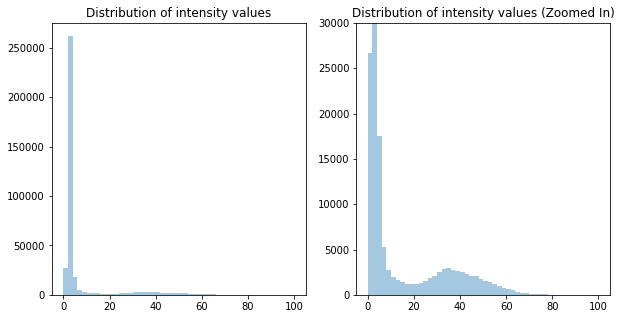

In [11]:
# Let's look at the distribution of the intensity values of all the pixels
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(grayimg.flatten(),kde=False)# Flattens the matrix and puts the intensity values of all the pixels in one single row vector
plt.title('Distribution of intensity values')

# Zoom in on the distribution and see if there is more than one prominent peak 
plt.subplot(1,2,2)
sns.distplot(grayimg.flatten(),kde=False) 
plt.ylim(0,30000) 
plt.title('Distribution of intensity values (Zoomed In)')

In [12]:
# Otsu's threshold method
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(grayimg)
print('The optimal separation value is',thresh_val)

The optimal separation value is 21


In [13]:
mask=np.where(grayimg>thresh_val,1,0)

Text(0.5,1,'Mask')

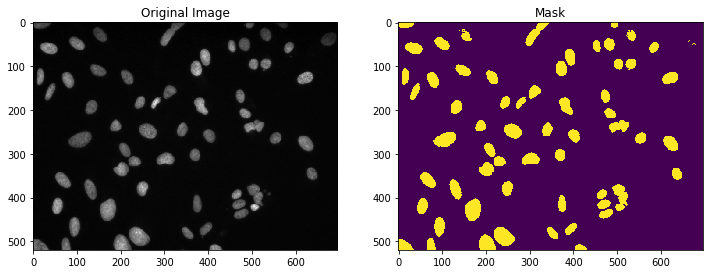

In [14]:
# Comparing original image and mask side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
maskimg = mask.copy()
plt.imshow(maskimg, cmap='viridis')
plt.title('Mask')

Text(0.5,1,'Mask with Otsu Separation')

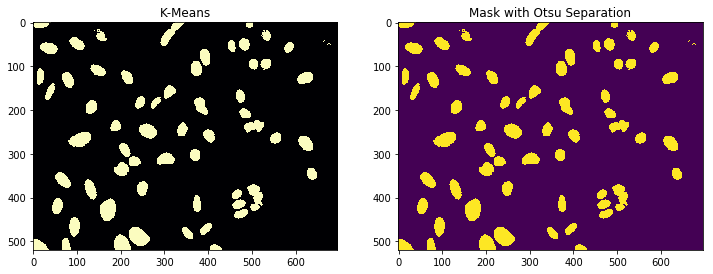

In [15]:
# Let's see if K-Means does a good job on this data 
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2) #2 as we're still trying to separate the lighter coloured nuclei from the darker coloured background 
kmeans.fit(grayimg.reshape(grayimg.shape[0]*grayimg.shape[1],1))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(kmeans.labels_.reshape(520,696),cmap='magma')
plt.title('K-Means')

plt.subplot(1,2,2)
plt.imshow(maskimg, cmap='viridis')
plt.title('Mask with Otsu Separation')

In [16]:
# Check if there's any difference
sum((kmeans.labels_.reshape(520,696)==mask).flatten())/(mask.shape[0]*mask.shape[1])

1.0

## Object identification

In [17]:
from scipy import ndimage

In [18]:
# Example
# Checking ndimage command at a matrix level
matrix = np.array([[0,0,1,1,1,1],
                  [0,0,0,0,1,1],
                  [1,1,0,1,1,1],
                  [1,1,0,1,1,1]])
matrix

array([[0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1]])

In [19]:
# Applying the ndimage.label function
ndimage.label(matrix)

(array([[0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 1],
        [2, 2, 0, 1, 1, 1],
        [2, 2, 0, 1, 1, 1]], dtype=int32), 2)

In [20]:
labels,nlabels=ndimage.label(mask)
print('There are',nlabels,'distinct nuclei in the mask.')

There are 70 distinct nuclei in the mask.


In [21]:
# Since we need to create a separate mask for every nucleus, let's store the masks in an iterable like a list 
label_array=[]
# ndimage.label encodes every object starting from number 1
for i in range(1, nlabels+1):
    label_mask = np.where(labels==i,1,0)
    label_array.append(label_mask)
#To see one such mask
label_array[68]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

## Run Length Encoding

In [22]:
#Function for rle encoding
def rle(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    # print(x.T.flatten())
    # print("dots:",dots)
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return " ".join([str(i) for i in run_lengths])

In [23]:
x = np.array([[1,2,3],[1,1,0],[0,1,1]])
rle(x)

'1 2 5 2 9 1'

In [24]:
#Running RLE on the last label_mask in label_array gives us 
rle(label_mask)

'210075 6 210593 8 211112 9 211631 10 212150 11 212669 12 213189 12 213709 12 214228 13 214748 13 215268 13 215788 13 216308 13 216828 13 217348 13 217869 12 218389 12 218909 12 219430 11 219950 11 220471 10 220991 10 221512 9 222033 8 222554 7 223075 6 223596 5 224117 4 224640 1'

## Putting everything together

In [25]:
# Take a look at the different parts
im_path.parts

('..',
 'input',
 'stage1_train',
 '10ba6cbee4873b32d5626a118a339832ba2b15d8643f66dddcd7cb2ec80fbc28',
 'images',
 '10ba6cbee4873b32d5626a118a339832ba2b15d8643f66dddcd7cb2ec80fbc28.png')

In [26]:
# Define a function that is applicable to all images
def basic(im_path):
    # Reading the image
    im_id=im_path.parts[-3] # extracting the image ID
    bgr = cv2.imread(str(im_path)) # reading image using OpenCV
    gray = cv2.cvtColor(bgr,cv2.COLOR_BGR2GRAY) # converting everything to grayscale from BGR

    # Removing the background
    thresh_val = threshold_otsu(gray) # using Otsu's method to separate the foreground objects from the background
    mask = np.where(gray > thresh_val, 1, 0) # coding as 1 all objects with intensity values higher than background 
    
    # Extracting connected objects
    test_rle=pd.DataFrame()
    # labels gives the labels of the different objects in each image starting from 1
    # nlabels gives us the total number of objects in each image
    labels, nlabels = ndimage.label(mask)  
    for i in range(1,nlabels+1): # iterating through every object/label
        label_mask = np.where(labels==i,1,0) # individual masks for every nucleus
        RLE = rle(label_mask) # RLE for each mask
        solution = pd.Series({'ImageId': im_id, 'EncodedPixels': RLE})
        test_rle = test_rle.append(solution, ignore_index=True)
    
    # Return the dataframe
    return(test_rle)

In [27]:
test_images = pathlib.Path('../input/stage1_test/').glob('*/images/*.png')
test_images = list(test_images)
basic(test_images[0])

,EncodedPixels,ImageId
0,22273 3 22529 5 22785 7 23041 8 23297 8 23553 ...,7f4cbe0b36b5d09466476a7d4e01f4f976c67872d549f4...
1,31233 1 31489 10 31745 11 32001 12 32257 12 32...,7f4cbe0b36b5d09466476a7d4e01f4f976c67872d549f4...
2,38913 1 39169 1 39425 1 39681 1 39937 1 40193 ...,7f4cbe0b36b5d09466476a7d4e01f4f976c67872d549f4...
3,45057 3 45313 4 45569 5 45825 4 46081 4 46337 ...,7f4cbe0b36b5d09466476a7d4e01f4f976c67872d549f4...
4,18714 3 18968 7 19223 11 19478 12 19734 15 199...,7f4cbe0b36b5d09466476a7d4e01f4f976c67872d549f4...
5,34083 3 34336 8 34589 12 34844 13 35099 15 353...,7f4cbe0b36b5d09466476a7d4e01f4f976c67872d549f4...
6,22839 6 23093 13 23348 15 23604 16 23859 18 24...,7f4cbe0b36b5d09466476a7d4e01f4f976c67872d549f4...
7,35901 10 36155 13 36410 14 36665 16 36920 17 3...,7f4cbe0b36b5d09466476a7d4e01f4f976c67872d549f4...
8,29255 5 29504 14 29519 1 29759 18 30014 19 302...,7f4cbe0b36b5d09466476a7d4e01f4f976c67872d549f4...
9,55897 8 56152 11 56406 14 56661 16 56916 18 57...,7f4cbe0b36b5d09466476a7d4e01f4f976c67872d549f4...


In [28]:
# Defining a function that takes a list of image paths (pathlib.Path objects), analyzes each and returns a submission ready DataFrame
def list_of_images(im_path_list):
    all_df = pd.DataFrame()
    for im_path in im_path_list: # we'll use this for the test images
        im_df = basic(im_path) # creating one dataframe for every image 
        all_df = all_df.append(im_df, ignore_index=True) # appending all these dataframes
    
    # Returning the submission-ready dataframe
    return (all_df)

In [29]:
basic_solution = list_of_images(list(test_images))
basic_solution.to_csv('basic_solution.csv', index=None)

## Edge Detection


Text(0.5,1,'Sobel Y (horizontal edges)')

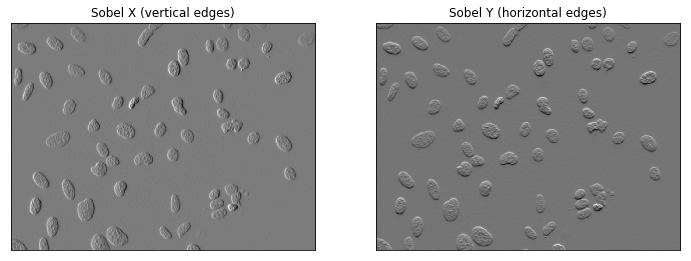

In [30]:
# cv2.Sobel arguments - the image, output depth, order of derivative of x, order of derivative of y, kernel/filter size
sobelx = cv2.Sobel(grayimg,int(cv2.CV_64F),1,0,ksize=3) # ksize=3 means we'll be using the 3x3 Sobel filter
sobely = cv2.Sobel(grayimg,int(cv2.CV_64F),0,1,ksize=3)

# Plot the vertical and horizontal edge detectors side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(sobelx,cmap='gray')
plt.title('Sobel X (vertical edges)')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(sobely,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Sobel Y (horizontal edges)')

Text(0.5,1,'Sobel Filter')

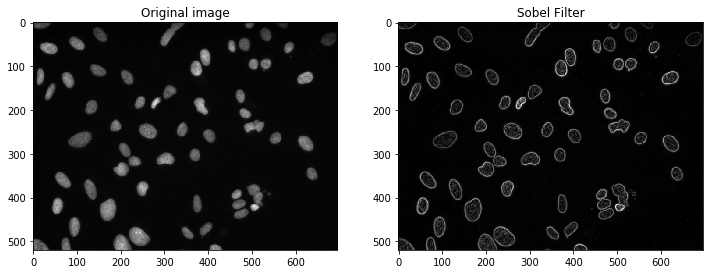

In [31]:
# Plotting the original image
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original image')

# Now combine the 2 sobel filters
sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
plt.subplot(1,2,2)
plt.imshow(sobel,cmap='gray')
plt.title('Sobel Filter')

([], <a list of 0 Text yticklabel objects>)

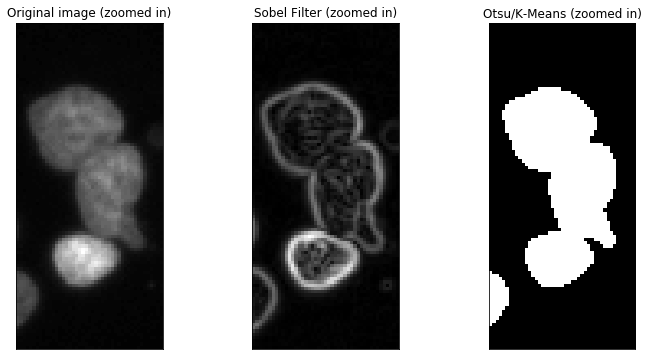

In [32]:
# Highlight the troublesome areas
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(grayimg[350:450,485:530],cmap='gray')
plt.title('Original image (zoomed in)')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(sobel[350:450,485:530],cmap='gray')
plt.title('Sobel Filter (zoomed in)')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(maskimg[350:450,485:530], cmap='gray')
plt.title('Otsu/K-Means (zoomed in)')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

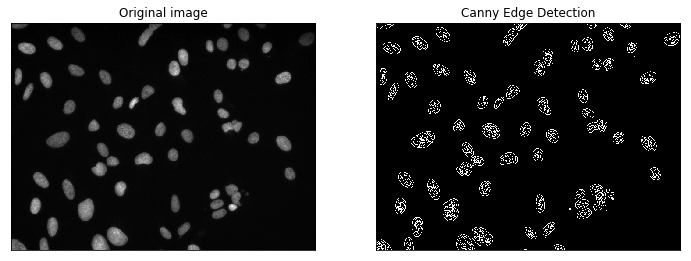

In [34]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

# Let's use the Canny Edge Detector
plt.subplot(1,2,2)
canny = cv2.Canny(grayimg,0,21)
plt.imshow(canny,cmap='gray')
plt.title('Canny Edge Detection')
plt.xticks([])
plt.yticks([])

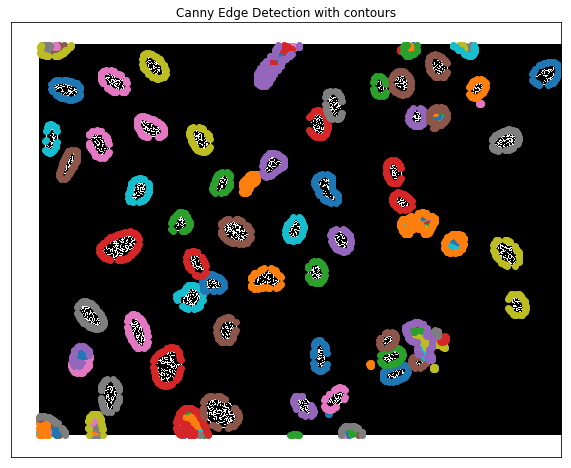

In [35]:
# Using contouring to create the masks
# Using an approximation function to obtain the contour points and retreiving only the external contours
canny_cont=cv2.findContours(canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[1] 

# Showing the contour points
plt.figure(figsize=(14,8))
plt.imshow(canny,cmap='gray')
plt.title('Canny Edge Detection with contours')
plt.xticks([])
plt.yticks([])

for i in (range(len(canny_cont))):
    plt.scatter(canny_cont[i].flatten().reshape(len(canny_cont[i]),2)[:,0],
         canny_cont[i].flatten().reshape(len(canny_cont[i]),2)[:,1])

([], <a list of 0 Text yticklabel objects>)

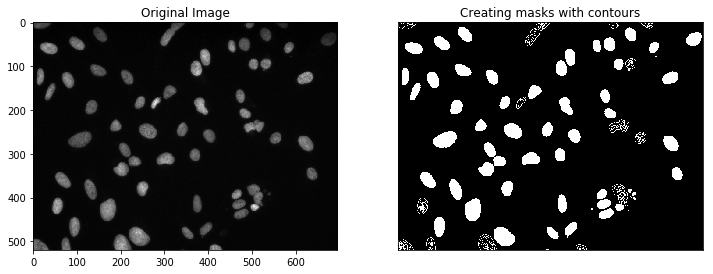

In [36]:
# Plot the original image
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(grayimg, cmap='gray')
plt.title('Original Image')

# Create masks with contours
background=np.zeros(grayimg.shape)
canny_mask=cv2.drawContours(background,canny_cont,-1,255,-1)

plt.subplot(1,2,2)
plt.imshow(canny_mask,cmap='gray')
plt.title('Creating masks with contours')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

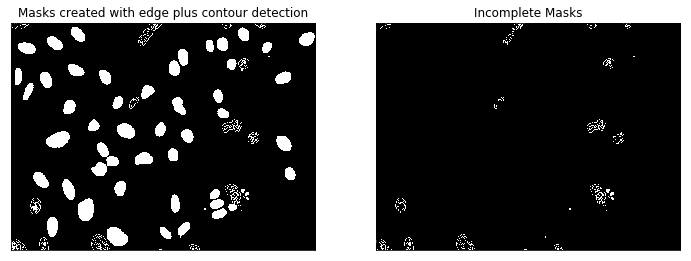

In [37]:
# Searching for incomplete masks
 
canny_mask_copy=canny_mask.copy()
# Here we use again ndimage.label on Canny edge detected masks 
canny_mask_clabels=ndimage.label(canny_mask_copy)[0]
for label_ind, label_mat in enumerate(ndimage.find_objects(canny_mask_clabels)):
    cell = canny_mask_clabels[label_mat]
    # Check if the label size is too small
    if np.product(cell.shape) < 100:
        canny_mask_clabels[np.where(canny_mask_clabels==label_ind+1)]=1
canny_mask_clabels=np.where(canny_mask_clabels>1,0,canny_mask_clabels)

#To show the original mask
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(canny_mask,cmap='gray')
plt.title('Masks created with edge plus contour detection')
plt.xticks([])
plt.yticks([])

#To plot the problem areas
plt.subplot(1,2,2)
plt.imshow(canny_mask_clabels,cmap='gray')
plt.title('Incomplete Masks')
plt.xticks([])
plt.yticks([])

In [38]:
#For convolving 2D arrays
from scipy import signal

Text(0.5,1,'Smoothened Canny Mask with Otsu threshold value')

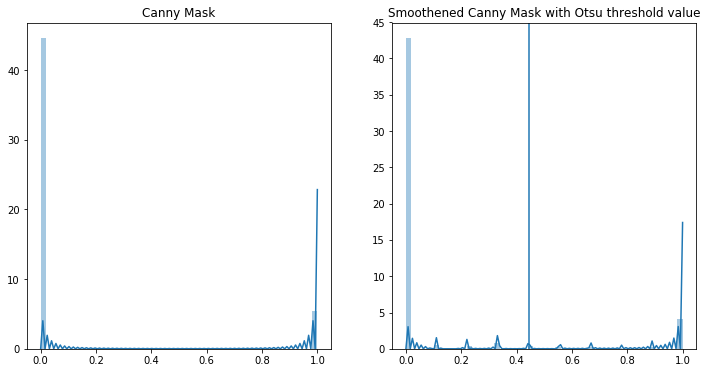

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(np.where(canny_mask==255,1,0).flatten())
plt.title('Canny Mask')

plt.subplot(1,2,2)
#To smooth the canny_mask by convolving with a matrix that has all values = 1/9
canny_mask_smooth=signal.convolve2d(np.where(canny_mask==255,1,0),np.full((3,3),1/9),'same')
sns.distplot(canny_mask_smooth.flatten())
canny_mask_smooth_thresh=threshold_otsu(canny_mask_smooth)
plt.axvline(x=canny_mask_smooth_thresh)
plt.title('Smoothened Canny Mask with Otsu threshold value')

([], <a list of 0 Text yticklabel objects>)

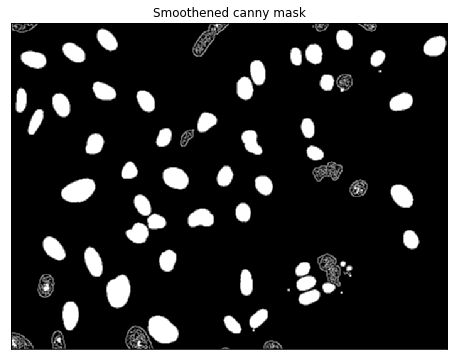

In [41]:
plt.figure(figsize=(12,6))
plt.imshow(canny_mask_smooth,cmap='gray')
plt.title('Smoothened canny mask')
plt.xticks([])
plt.yticks([])

Text(0.5,1,'After 1 convolution')

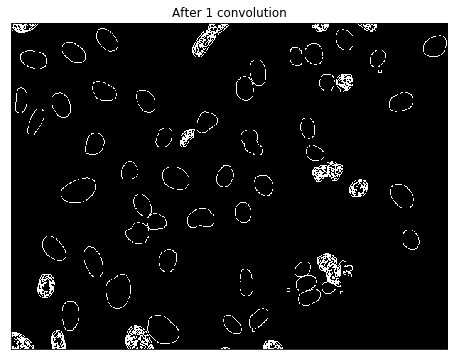

In [42]:
# Setting all values above Otsu's threshold as 0 in the matrix and in this image matrix setting all values above 0 as 1 
plt.figure(figsize=(12,6))
canny_conv1=np.where(np.where(canny_mask_smooth>canny_mask_smooth_thresh,0,canny_mask_smooth)>0,1,0)
plt.imshow(canny_conv1,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('After 1 convolution')

Text(0.5,1,'After 2 convolutions')

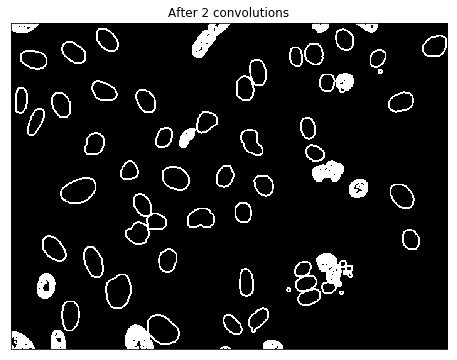

In [43]:
plt.figure(figsize=(12,6))
canny_mask_smooth2=signal.convolve2d(canny_conv1,np.full((3,3),1/9),'same')
canny_mask_smooth_thresh2=threshold_otsu(canny_mask_smooth2)
canny_conv2=np.where(canny_mask_smooth2>canny_mask_smooth_thresh2,1,0)
plt.imshow(canny_conv2,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('After 2 convolutions')

([], <a list of 0 Text yticklabel objects>)

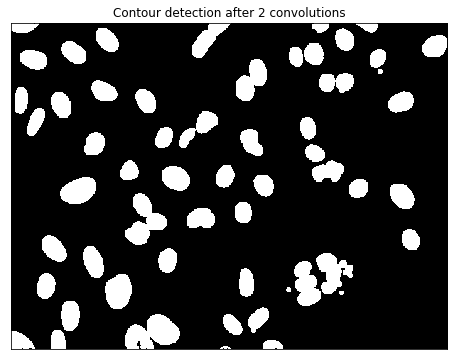

In [44]:
# Combining the 2 convolutions 
canny_cont=cv2.findContours(cv2.convertScaleAbs(canny_conv2),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[1]
background=np.zeros(grayimg.shape)
canny_mask=cv2.drawContours(background,canny_cont,-1,255,-1)

plt.figure(figsize=(12,6))
plt.imshow(canny_mask,cmap='gray')
plt.title('Contour detection after 2 convolutions')
plt.xticks([])
plt.yticks([])

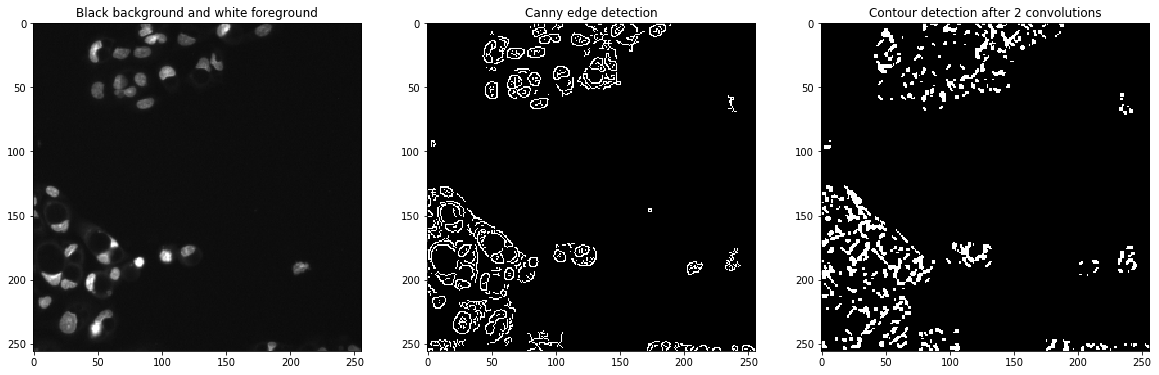

In [46]:
# Let's try the same parameters for canny edge on other types of images - starting with another black background and white foreground image
for i in range(len(training_sorted)):
    if training_sorted[i].parts[-1]=='feffce59a1a3eb0a6a05992bb7423c39c7d52865846da36d89e2a72c379e5398.png':
        bwimg=cv2.imread(str(training_sorted[i]))
        bwimg=cv2.cvtColor(bwimg,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(20,8))
        plt.subplot(1,3,1)
        plt.imshow(bwimg)
        plt.title('Black background and white foreground')
        
        plt.subplot(1,3,2)
        bwimg=cv2.cvtColor(bwimg,cv2.COLOR_RGB2GRAY)
        bwimg_canny=cv2.Canny(bwimg,0,21)
        plt.imshow(bwimg_canny,cmap='gray')
        plt.title('Canny edge detection')
        
        plt.subplot(1,3,3)
        bwimg_cont=cv2.findContours(bwimg_canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[1]
        # Create masks with contours
        bwimg_bg=np.zeros(bwimg.shape)
        bwimg_mask=cv2.drawContours(bwimg_bg,bwimg_cont,-1,255,-1)
        
        # Convolving once
        bwimg_mask_smooth=signal.convolve2d(np.where(bwimg_mask==255,1,0),np.full((3,3),1/9),'same')
        bwimg_mask_smooth_thresh=threshold_otsu(bwimg_mask_smooth)
        bwimg_conv1=np.where(np.where(bwimg_mask_smooth>bwimg_mask_smooth_thresh,0,bwimg_mask_smooth)>0,1,0)
        
        # Convolving again
        bwimg_mask_smooth2=signal.convolve2d(bwimg_conv1,np.full((3,3),1/9),'same')
        bwimg_mask_smooth_thresh2=threshold_otsu(bwimg_mask_smooth2)
        bwimg_conv2=np.where(bwimg_mask_smooth2>bwimg_mask_smooth_thresh2,1,0)
        
        # Create masks with contours after 2 convolutions
        bwimg_cont=cv2.findContours(cv2.convertScaleAbs(bwimg_conv2),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[1]
        bwimg_bg=np.zeros(bwimg.shape)
        bwimg_mask=cv2.drawContours(bwimg_bg,bwimg_cont,-1,255,-1)

        plt.imshow(bwimg_mask,cmap='gray')
        plt.title('Contour detection after 2 convolutions')

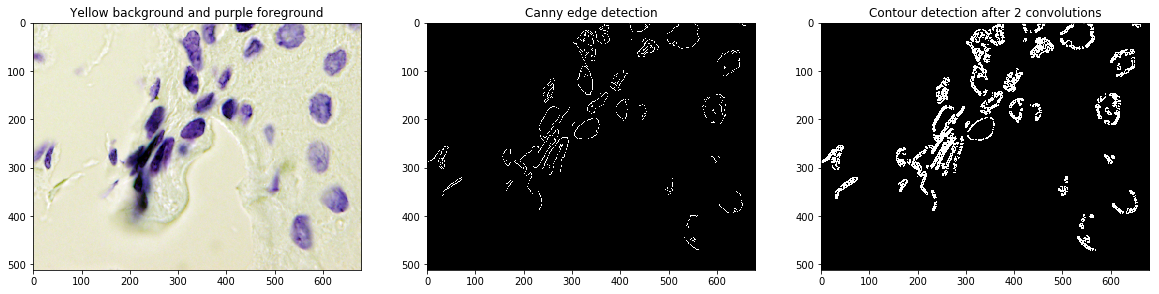

In [48]:
# Failure case
# There are some images in the test set with a yellow background and purple foreground
test_images = pathlib.Path('../input/stage1_test/').glob('*/images/*.png')
testing_sorted=sorted([x for x in test_images])
for i in range(len(testing_sorted)):
    if testing_sorted[i].parts[-1]=='9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab.png':
        ypimg=cv2.imread(str(testing_sorted[i]))
        ypimg=cv2.cvtColor(ypimg,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(20,8))
        plt.subplot(1,3,1)
        plt.imshow(ypimg)
        plt.title('Yellow background and purple foreground')
        
        plt.subplot(1,3,2)
        ypimg=cv2.cvtColor(ypimg,cv2.COLOR_RGB2GRAY)
        ypimg_canny=cv2.Canny(ypimg,100,200)
        plt.imshow(ypimg_canny,cmap='gray')
        plt.title('Canny edge detection')
        
        plt.subplot(1,3,3)
        ypimg_cont=cv2.findContours(ypimg_canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[1]
        # Create masks with contours
        ypimg_bg=np.zeros(ypimg.shape)
        ypimg_mask=cv2.drawContours(ypimg_bg,ypimg_cont,-1,255,-1)
        
        # Convolving once
        ypimg_mask_smooth=signal.convolve2d(np.where(ypimg_mask==255,1,0),np.full((3,3),1/9),'same')
        ypimg_mask_smooth_thresh=threshold_otsu(ypimg_mask_smooth)
        ypimg_conv1=np.where(np.where(ypimg_mask_smooth>ypimg_mask_smooth_thresh,0,ypimg_mask_smooth)>0,1,0)
        
        # Convolving again
        ypimg_mask_smooth2=signal.convolve2d(ypimg_conv1,np.full((3,3),1/9),'same')
        ypimg_mask_smooth_thresh2=threshold_otsu(ypimg_mask_smooth2)
        ypimg_conv2=np.where(ypimg_mask_smooth2>ypimg_mask_smooth_thresh2,1,0)
        
        # Create masks with contours after 2 convolutions
        ypimg_cont=cv2.findContours(cv2.convertScaleAbs(ypimg_conv2),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[1]
        ypimg_bg=np.zeros(ypimg.shape)
        ypimg_mask=cv2.drawContours(ypimg_bg,ypimg_cont,-1,255,-1)

        plt.imshow(ypimg_conv2,cmap='gray')
        plt.title('Contour detection after 2 convolutions')

## Pixel Classifier

In [50]:
import os
train_path = '../input/stage1_train/'
test_path = '../input/stage1_test/'
train_ids = os.listdir(train_path)
def LabelMerge(imgpath):
    #to get all the png files
    png_files = [f for f in os.listdir(imgpath) if f.endswith('.png')]
    #to load the image as a grayscale
    img = cv2.imread(imgpath+'/'+png_files[0],0)
    for i in png_files[1:]:
        temp_img = cv2.imread(imgpath+'/'+i,0)
        img = img+temp_img
    return(img)

Text(0.5,1,'Combined Mask')

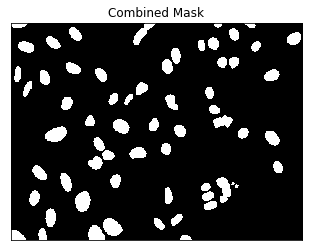

In [51]:
path = train_path+training_sorted[45].parts[-3]+'/masks/'
combined_mask=LabelMerge(path)
plt.imshow(combined_mask,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Combined Mask')

Text(0.5,1,'Label from the combined mask')

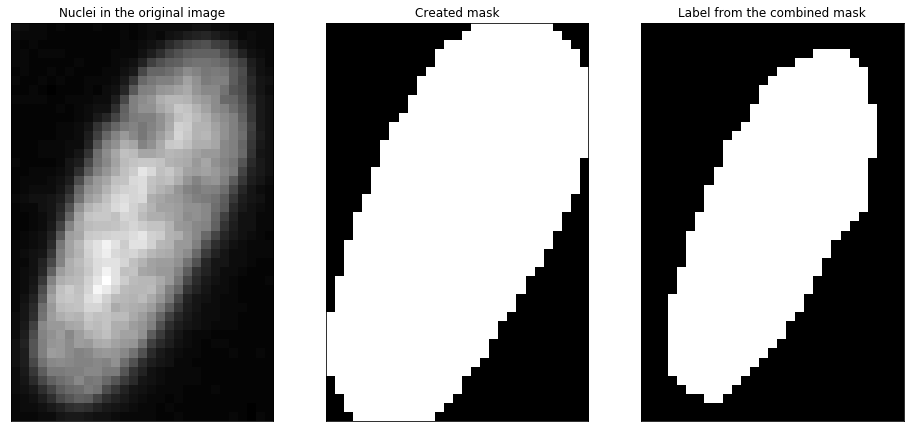

In [52]:
objects=ndimage.label(canny_mask)[0]
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.imshow(grayimg[ndimage.find_objects(objects)[20]],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Nuclei in the original image')

plt.subplot(1,3,2)
plt.imshow(canny_mask[ndimage.find_objects(objects)[20]],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Created mask')

plt.subplot(1,3,3)
plt.imshow(combined_mask[ndimage.find_objects(objects)[20]],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Label from the combined mask')

In [54]:
# Getting one dataframe for all the pixels within all the bounding boxes in an image
pixels_gs=pd.DataFrame()
columns=[]
for i in range(9):
    columns.append('pixel-'+str(i))
columns=columns+['label']
bounding=ndimage.find_objects(objects)
for bbox in bounding:
    for i in range(1,canny_mask[bbox].shape[0]-1):
        for j in range(1,canny_mask[bbox].shape[1]-1):
            pixel0=grayimg[bbox][i][j] # center pixel
            pixel1=grayimg[bbox][i-1][j-1] # top left pixel
            pixel2=grayimg[bbox][i-1][j] # pixel above the center pixel
            pixel3=grayimg[bbox][i-1][j+1] # top right pixel
            pixel4=grayimg[bbox][i][j-1] # pixel to the left of center pixel
            pixel5=grayimg[bbox][i][j+1] # pixel to the right of center pixel
            pixel6=grayimg[bbox][i+1][j-1] # bottom left pixel
            pixel7=grayimg[bbox][i+1][j] # pixel to the bottom of center pixel 
            pixel8=grayimg[bbox][i+1][j+1] # bottom right pixel
            label=combined_mask[i][j] # label of the center pixel
            neighbors = pd.Series({a:b for (a,b) in zip(columns,[pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,label])})
            pixels_gs = pixels_gs.append(neighbors, ignore_index=True)

In [55]:
# Head of the dataframe
pixels_gs.head()

,label,pixel-0,pixel-1,pixel-2,pixel-3,pixel-4,pixel-5,pixel-6,pixel-7,pixel-8
0,0.0,6.0,3.0,3.0,7.0,3.0,13.0,4.0,11.0,17.0
1,0.0,13.0,3.0,7.0,13.0,6.0,19.0,11.0,17.0,22.0
2,255.0,19.0,7.0,13.0,18.0,13.0,20.0,17.0,22.0,23.0
3,255.0,20.0,13.0,18.0,19.0,19.0,22.0,22.0,23.0,24.0
4,255.0,22.0,18.0,19.0,23.0,20.0,26.0,23.0,24.0,25.0


In [56]:
pixels_gs['label'].value_counts()

0.0      50464
255.0    24766
Name: label, dtype: int64

In [57]:
# Split data into training and testing sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test=train_test_split(pixels_gs.drop('label',axis=1),pixels_gs['label'],test_size=0.3,random_state=101)
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[13095  2055]
 [ 3925  3494]]
             precision    recall  f1-score   support

        0.0       0.77      0.86      0.81     15150
      255.0       0.63      0.47      0.54      7419

avg / total       0.72      0.74      0.72     22569



In [60]:
predicted=np.zeros((canny_mask.shape))
bbox=[]
bbox_dim_prod=[0]
rfc_pred = rfc.predict(pixels_gs.drop('label',axis=1))
for i in range(len(bounding)):
    bbox_dim=np.array(list(background[bounding[i]].shape))-2 #Since we are taking 1 to (n-1) rows and 1 to (n-1) columns
    bbox_dim_prod.append(np.product(bbox_dim)) #for indexing
    bbox_pred=rfc_pred[sum(bbox_dim_prod[0:i+1]):sum(bbox_dim_prod[0:i+1])+np.product(bbox_dim)].reshape(bbox_dim[0],bbox_dim[1]) #for reshaping the predicted labels into the reduced dimensions of the bounding box 
    bbox.append(bbox_pred)
    predicted[bounding[i]][1:predicted[bounding[i]].shape[0]-1,1:predicted[bounding[i]].shape[1]-1]=bbox[i]

([], <a list of 0 Text yticklabel objects>)

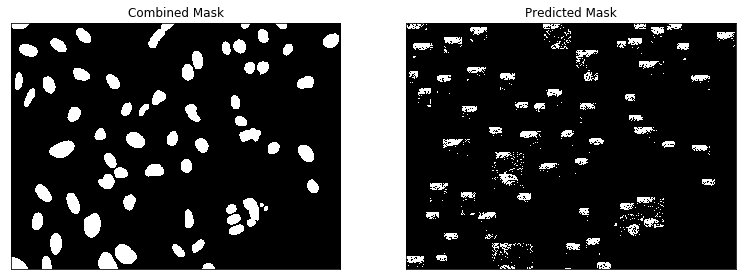

In [61]:
plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
plt.imshow(combined_mask,cmap='gray')
plt.title('Combined Mask')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(predicted,cmap='gray')
plt.title('Predicted Mask')
plt.xticks([])
plt.yticks([])